In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [10]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"


In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

Processing Record 1 of Set 13 | lebu
Processing Record 2 of Set 13 | busselton
Processing Record 3 of Set 13 | bethel
Processing Record 4 of Set 13 | hermanus
Processing Record 5 of Set 13 | coihaique
Processing Record 6 of Set 13 | mar del plata
Processing Record 7 of Set 13 | narsaq
Processing Record 8 of Set 13 | yellowknife
Processing Record 9 of Set 13 | provideniya
Processing Record 10 of Set 13 | mataura
Processing Record 11 of Set 13 | palabuhanratu
Processing Record 12 of Set 13 | lerwick
Processing Record 13 of Set 13 | tomatlan
Processing Record 14 of Set 13 | lagoa
Processing Record 15 of Set 13 | albany
Processing Record 16 of Set 13 | nizhneyansk
Processing Record 17 of Set 13 | katsiveli
Processing Record 18 of Set 13 | carbonia
Processing Record 19 of Set 13 | castro
Processing Record 20 of Set 13 | cape town
Processing Record 21 of Set 13 | katsuura
Processing Record 22 of Set 13 | adrar
Processing Record 23 of Set 13 | mahebourg
Processing Record 24 of Set 13 | kieta


In [13]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 7 of Set 25 | lebu
Processing Record 8 of Set 25 | busselton
Processing Record 9 of Set 25 | bethel
Processing Record 10 of Set 25 | hermanus
Processing Record 11 of Set 25 | coihaique
Processing Record 12 of Set 25 | mar del plata
Processing Record 13 of Set 25 | narsaq
Processing Record 14 of Set 25 | yellowknife
Processing Record 15 of Set 25 | provideniya
Processing Record 16 of Set 25 | mataura
Processing Record 17 of Set 25 | palabuhanratu
City not found. Skipping...
Processing Record 18 of Set 25 | lerwick
Processing Record 19 of Set 25 | tomatlan
Processing Record 20 of Set 25 | lagoa
Processing Record 21 of Set 25 | albany
Processing Record 22 of Set 25 | nizhneyansk
City not found. Skipping...
Processing Record 23 of Set 25 | katsiveli
City not found. Skipping...
Processing Record 24 of Set 25 | carbonia
Processing Record 25 of Set 25 | castro
Processing Record 26 of Set 25 | cape town
Processing Record 27 of Set 25 | katsuura
Processing Record 28 of Set 25 

City not found. Skipping...
Processing Record 32 of Set 28 | hithadhoo
Processing Record 33 of Set 28 | gazli
Processing Record 34 of Set 28 | thompson
Processing Record 35 of Set 28 | grand gaube
Processing Record 36 of Set 28 | kaitong
Processing Record 37 of Set 28 | kavaratti
Processing Record 38 of Set 28 | tubruq
City not found. Skipping...
Processing Record 39 of Set 28 | miranorte
City not found. Skipping...
Processing Record 40 of Set 28 | galle
Processing Record 41 of Set 28 | mayo
Processing Record 42 of Set 28 | lompoc
Processing Record 43 of Set 28 | guozhen
Processing Record 44 of Set 28 | lorengau
Processing Record 45 of Set 28 | beringovskiy
Processing Record 46 of Set 28 | savannah bight
Processing Record 47 of Set 28 | esso
Processing Record 48 of Set 28 | goryachegorsk
Processing Record 49 of Set 28 | nemuro
Processing Record 50 of Set 28 | college
Processing Record 1 of Set 29 | nouna
Processing Record 2 of Set 29 | sambava
Processing Record 3 of Set 29 | geraldton


Processing Record 15 of Set 32 | thinadhoo
Processing Record 16 of Set 32 | dingle
Processing Record 17 of Set 32 | yanan
City not found. Skipping...
Processing Record 18 of Set 32 | tabou
Processing Record 19 of Set 32 | yola
Processing Record 20 of Set 32 | griffith
Processing Record 21 of Set 32 | sao joao da barra
Processing Record 22 of Set 32 | litovko
Processing Record 23 of Set 32 | marzuq
Processing Record 24 of Set 32 | estelle
Processing Record 25 of Set 32 | santa maria da boa vista
Processing Record 26 of Set 32 | baykit
Processing Record 27 of Set 32 | barguzin
Processing Record 28 of Set 32 | sept-iles
Processing Record 29 of Set 32 | hua hin
Processing Record 30 of Set 32 | zaysan
Processing Record 31 of Set 32 | sibolga
Processing Record 32 of Set 32 | aginskoye
Processing Record 33 of Set 32 | christchurch
Processing Record 34 of Set 32 | victor harbor
Processing Record 35 of Set 32 | saint-augustin
Processing Record 36 of Set 32 | haapiti
Processing Record 37 of Set 

Processing Record 5 of Set 36 | merauke
Processing Record 6 of Set 36 | lasa
Processing Record 7 of Set 36 | cedro
Processing Record 8 of Set 36 | khorixas
Processing Record 9 of Set 36 | caconda
Processing Record 10 of Set 36 | cap malheureux
Processing Record 11 of Set 36 | rasht
Processing Record 12 of Set 36 | yei
Processing Record 13 of Set 36 | ugoofaaru
Processing Record 14 of Set 36 | terrace
Processing Record 15 of Set 36 | halifax
Processing Record 16 of Set 36 | la ronge
Processing Record 17 of Set 36 | bilibino
Processing Record 18 of Set 36 | okhotsk
Processing Record 19 of Set 36 | jishou
Processing Record 20 of Set 36 | banda aceh
Processing Record 21 of Set 36 | vikravandi
Processing Record 22 of Set 36 | rhyl
Processing Record 23 of Set 36 | sirur
Processing Record 24 of Set 36 | macae
Processing Record 25 of Set 36 | poindimie
Processing Record 26 of Set 36 | galesong
Processing Record 27 of Set 36 | bongandanga
Processing Record 28 of Set 36 | mogok
Processing Record

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lebu,-37.62,-73.65,50.94,90,100,18.03,CL,2020-08-24 00:10:56
1,Busselton,-33.65,115.33,46.00,86,0,5.01,AU,2020-08-24 00:10:56
2,Bethel,41.37,-73.41,80.60,57,1,6.93,US,2020-08-24 00:10:56
3,Hermanus,-34.42,19.23,55.00,95,100,5.82,ZA,2020-08-24 00:10:56
4,Coihaique,-45.58,-72.07,35.60,93,90,5.82,CL,2020-08-24 00:10:56
5,Mar Del Plata,-38.00,-57.56,51.01,93,17,13.87,AR,2020-08-24 00:06:39
6,Narsaq,60.92,-46.05,48.20,76,20,2.24,GL,2020-08-24 00:10:57
7,Yellowknife,62.46,-114.35,63.00,48,20,2.24,CA,2020-08-24 00:10:57
8,Provideniya,64.38,-173.30,53.60,76,90,6.71,RU,2020-08-24 00:10:57
9,Mataura,-46.19,168.86,55.99,79,12,5.99,NZ,2020-08-24 00:10:57


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [16]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lebu,CL,2020-08-24 00:10:56,-37.62,-73.65,50.94,90,100,18.03
1,Busselton,AU,2020-08-24 00:10:56,-33.65,115.33,46.00,86,0,5.01
2,Bethel,US,2020-08-24 00:10:56,41.37,-73.41,80.60,57,1,6.93
3,Hermanus,ZA,2020-08-24 00:10:56,-34.42,19.23,55.00,95,100,5.82
4,Coihaique,CL,2020-08-24 00:10:56,-45.58,-72.07,35.60,93,90,5.82
5,Mar Del Plata,AR,2020-08-24 00:06:39,-38.00,-57.56,51.01,93,17,13.87
6,Narsaq,GL,2020-08-24 00:10:57,60.92,-46.05,48.20,76,20,2.24
7,Yellowknife,CA,2020-08-24 00:10:57,62.46,-114.35,63.00,48,20,2.24
8,Provideniya,RU,2020-08-24 00:10:57,64.38,-173.30,53.60,76,90,6.71
9,Mataura,NZ,2020-08-24 00:10:57,-46.19,168.86,55.99,79,12,5.99


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.-6.3.1
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [19]:
import time

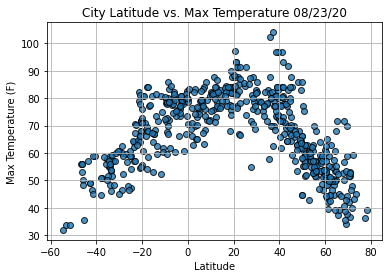

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

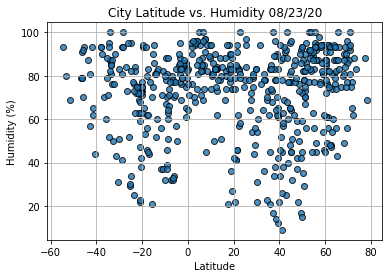

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

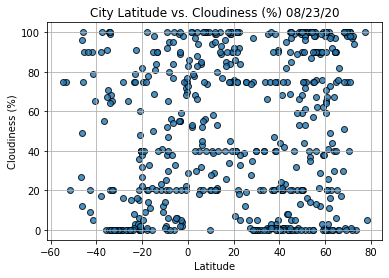

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

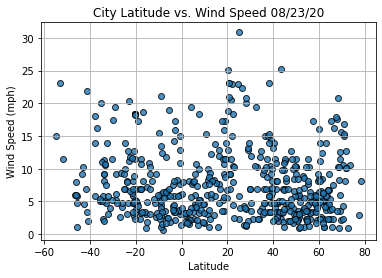

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [25]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
index13 = city_data_df.loc[13]
index13


City                       Albany
Country                        US
Date          2020-08-24 00:06:35
Lat                          42.6
Lng                        -73.97
Max Temp                    71.01
Humidity                       91
Cloudiness                     23
Wind Speed                   3.36
Name: 13, dtype: object

In [28]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4      False
       ...  
545    False
546     True
547     True
548     True
549     True
Name: Lat, Length: 550, dtype: bool

In [29]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Bethel,US,2020-08-24 00:10:56,41.37,-73.41,80.6,57,1,6.93
6,Narsaq,GL,2020-08-24 00:10:57,60.92,-46.05,48.2,76,20,2.24
7,Yellowknife,CA,2020-08-24 00:10:57,62.46,-114.35,63.0,48,20,2.24
8,Provideniya,RU,2020-08-24 00:10:57,64.38,-173.30,53.6,76,90,6.71
10,Lerwick,GB,2020-08-24 00:10:57,60.15,-1.15,50.0,87,65,16.11


In [51]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [56]:
from scipy.stats import linregress

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

plt.show()

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

In [70]:
# Linear regression on the norhtern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(15,60))

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))